* Name: `dissipation-theory--Study-22.ipynb`
* Author: John A. Marohn
* Date: 2024-07-15
* Continued from: ``dissipation-theory--Study-21.ipynb``
* Continued to: ---
* Summary: I have created a new data-analysis module, `data2.py`, in which the BLDS spectrum is fit to extact charge conductivity and charge density.  Use the module to analyze representative BLDS spectra.

# Preliminaries

In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 3.25, 3.5

In [34]:
from dissipationtheory.dissipation2 import CantileverModelJit, SampleModel1Jit, SampleModel2Jit, theta1norm_jit
from dissipationtheory.dissipation  import blds_perpendicular_jit
from dissipationtheory.data2 import BLDSData2, plotBLDSfindings
from dissipationtheory.constants import qe

In [4]:
THIS = 'dissipation-theory--Study-22--'
fig = {}

# Fit the BLDS spectra for PM6:Y6 on ITO

Reproduce the analysis in ``dissipation-theory--Study-22.ipynb`` using the functions defined in ``dissipationtheory.data2``.  The analysis in ``--Study-22`` was done on the `pm6-y6-ito-2` dataset.

In [45]:
filepath = {}
filepath = ['~','Dropbox','EFM_Data_workup','pm6-y6-paper-blds-data','pm6-y6','ito','pm6-y6-ito-1']

In [49]:
database = {}
database['A'] = {'filename': '230531-085452-BLDS-pm6-y6-3-dark.tsv', 'I [mW/cm^2]' : 0}
database['B'] = {'filename': '230531-085907-BLDS-pm6-y6-3-50mA.tsv', 'I [mW/cm^2]' : 0.84}
database['C'] = {'filename': '230531-090350-BLDS-pm6-y6-3-56mA.tsv', 'I [mW/cm^2]' : 5.4}
database['D'] = {'filename': '230531-090844-BLDS-pm6-y6-3-61mA.tsv', 'I [mW/cm^2]' : 54}
database['E'] = {'filename': '230531-091339-BLDS-pm6-y6-3-66mA.tsv', 'I [mW/cm^2]' : 103}
database['F'] = {'filename': '230531-091846-BLDS-pm6-y6-3-71mA.tsv', 'I [mW/cm^2]' : 154}

In [50]:
sample_jit = SampleModel1Jit(
    cantilever = CantileverModelJit(
        f_c = 75e3, 
        V_ts = 1.0,
        R = 38.4e-9,
        d = 200e-9),
    h_s = 110e-9, 
    epsilon_s = complex(3.4, 0),
    sigma = 1e-10,
    rho = 1e21,
    epsilon_d = complex(1e6, 0),
    z_r = 110e-9
)

In [48]:
D = {}
D = BLDSData2(THIS, filepath, database, sample_jit)

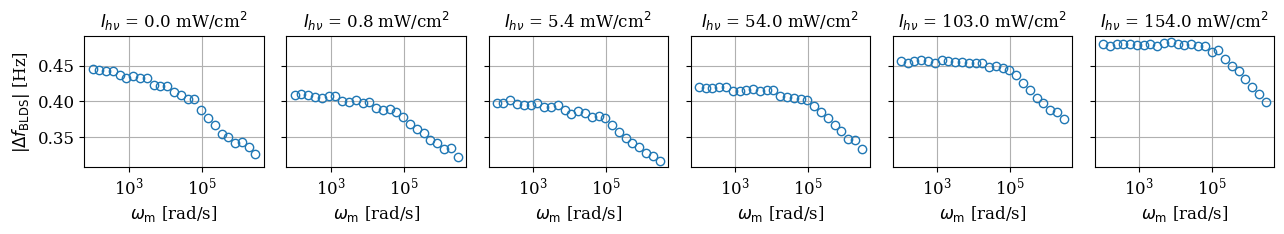

In [9]:
p = D.plotdata()

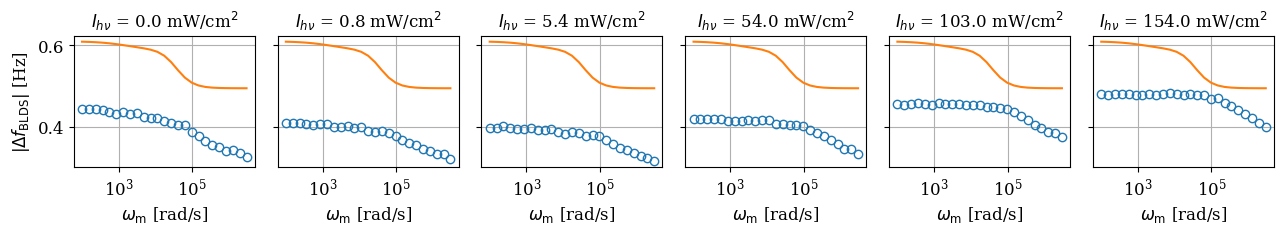

In [10]:
D.fitguess(290, 1e2, 20)
p = D.plotdata()

In [11]:
D.fit()

fitting dataset A
fitting dataset B
fitting dataset C
fitting dataset D
fitting dataset E
fitting dataset F


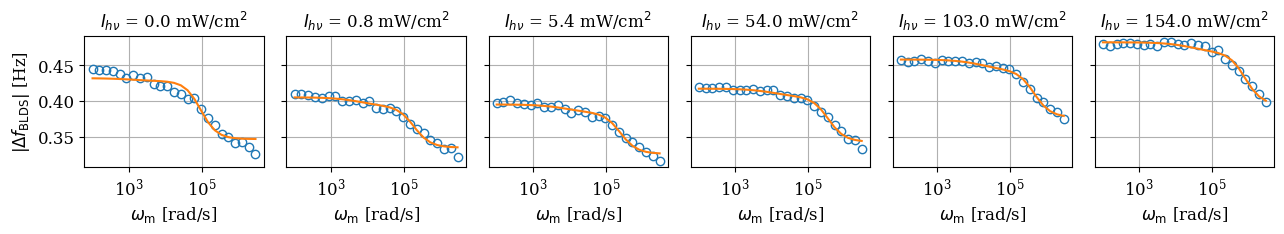

In [12]:
fig['01a'] = D.plotdata()

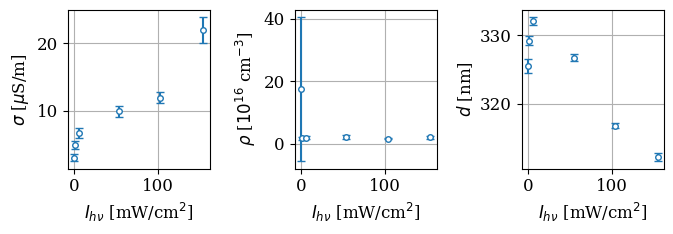

In [13]:
fig['01b'] = plotBLDSfindings(D)

Replot the charge density with the first point removed.  Also, plot the charge density in units of $1/\mathrm{m}^3$, to more easily compare to theory.

In [17]:
D.findings['density']

{'x': array([  0.  ,   0.84,   5.4 ,  54.  , 103.  , 154.  ]) <Unit('milliwatt / centimeter ** 2')>,
 'y': array([1.74461730e+23, 1.77183643e+22, 1.99840173e+22, 2.26914757e+22,
        1.67413814e+22, 2.06315644e+22]) <Unit('1 / meter ** 3')>,
 'yerr': array([2.30535015e+23, 4.60634148e+21, 5.11167108e+21, 5.50724471e+21,
        2.61050338e+21, 5.43741587e+21]) <Unit('1 / meter ** 3')>}

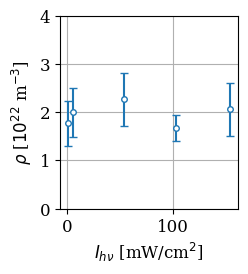

In [29]:
fig['01c'] = plt.figure(figsize=(2.3, 2.50))
opts = dict(marker='o', mfc='w', ms=4, capsize=3, linestyle='none')
data =  D.findings['density']
plt.errorbar(
    data['x'][1:].to('mW/cm^2').magnitude,
    data['y'][1:].to('1/m^3').magnitude/1e22,
    yerr = data['yerr'][1:].to('1/m^3').magnitude/1e22,
    **opts
)
plt.xlabel(r'$I_{h \nu}$ [mW/cm$^2$]')
plt.ylabel(r'$\rho$ [$10^{22}$ m$^{-3}$]')
plt.ylim([0,4])
plt.grid()
plt.show()

The charge density is orders-of-magnitude larger than the $\rho = -3.4 \times 10^{19} \: \mathrm{m}^{-3}$ value estimated assuming thermal equilibrium between Y6 on ITO.

The estimated charge mobility is in order-of-magnitude agreement with published results:

In [37]:
(D.findings['conductivity']['y'] / (qe * D.findings['density']['y'])).to('cm^2/(V s)')

Magnitude,[1.0884805477040028e-06 1.7609109624520972e-05 2.106196146138345e-05 2.7248169346110896e-05 4.4498528307672633e-05 6.626093604224733e-05]
Units,centimeter2/(second volt)


# Save all figures

In [51]:
for num in fig.keys():
    figname = THIS + "Fig-" + num
    fig[num].savefig(figname + '.png', dpi=300)
    fig[num].savefig(figname + '.pdf')